In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
import matplotlib.pyplot as plt

In [2]:
# load dataset 2

In [3]:
df = pd.read_csv('2_distribution_applicant_sex_and_action_taken.csv', low_memory=False)

# 3 ethnicity and race distribution

## All the race and ethnicity columns

applicant_ethnicity_1                     
applicant_ethnicity_2                     
applicant_ethnicity_3                     
applicant_ethnicity_4                     
applicant_ethnicity_5                                         
applicant_ethnicity_observed   

co_applicant_ethnicity_1 
co_applicant_ethnicity_3                  
co_applicant_ethnicity_4                  
co_applicant_ethnicity_5 
co_applicant_ethnicity_observed   

applicant_race_1                          
applicant_race_2                         
applicant_race_3                       
applicant_race_4                         
applicant_race_5    
applicant_race_observed  

co_applicant_race_1                      
co_applicant_race_2                      
co_applicant_race_3                      
co_applicant_race_4                 
co_applicant_race_5          
co_applicant_race_observed    

derived_ethnicity                         
derived_race

## Columns we use for the model
'applicant_ethnicity_1',
'co_applicant_ethnicity_1',
'applicant_race_1',
'applicant_race_2',
'co_applicant_race_1',
'co_applicant_race_2',

In [4]:
columns_of_interest = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

info_df = df[columns_of_interest]
print(info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190082 entries, 0 to 190081
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_ethnicity_1     189325 non-null  float64
 1   co_applicant_ethnicity_1  189801 non-null  float64
 2   applicant_race_1          189827 non-null  float64
 3   applicant_race_2          11484 non-null   float64
 4   co_applicant_race_1       189988 non-null  float64
 5   co_applicant_race_2       5740 non-null    float64
dtypes: float64(6)
memory usage: 8.7 MB
None


## Remove columns we dont need.

In [5]:
# List of columns to remove
columns_to_remove = ['applicant_ethnicity_2', 'applicant_ethnicity_3', 'applicant_ethnicity_4', 
                     'applicant_ethnicity_5', 'applicant_ethnicity_observed','co_applicant_ethnicity_2', 'co_applicant_ethnicity_3', 
                     'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5', 'co_applicant_ethnicity_observed',
                      'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 
                     'applicant_race_observed',  'co_applicant_race_3', 
                     'co_applicant_race_4', 'co_applicant_race_5', 'co_applicant_race_observed',
                     'derived_ethnicity', 'derived_race']

# Drop the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190082 entries, 0 to 190081
Data columns (total 76 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             190082 non-null  int64  
 1   lei                                       190082 non-null  object 
 2   derived_msa_md                            10838 non-null   float64
 3   state_code                                190024 non-null  object 
 4   county_code                               190014 non-null  float64
 5   census_tract                              190014 non-null  float64
 6   conforming_loan_limit                     190065 non-null  object 
 7   derived_loan_product_type                 190082 non-null  object 
 8   derived_dwelling_category                 190082 non-null  object 
 9   action_taken                              190082 non-null  int64  
 10  purchaser_type      

# Race

In [7]:
print(df['applicant_race_1'].value_counts())

applicant_race_1
5.0     135470
6.0      20192
2.0      13467
3.0      12658
21.0      2775
1.0       1634
22.0      1105
23.0       588
27.0       523
25.0       333
26.0       328
4.0        313
44.0       173
7.0        138
24.0        81
41.0        21
42.0        17
43.0        11
Name: count, dtype: int64


Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable

### We only want 5 - White and 3 - Black or African American

In [8]:
# Columns of interest
columns_of_race = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

### remove not needed columns

In [9]:
# Filter the DataFrame to keep rows with categories 2 and 3 for the specified columns
filtered_race = df[columns_of_race].isin([5.0, 3.0])

# Filter the race columns
filtered_df_race = df[columns_of_race][filtered_race]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([df.drop(columns_of_race, axis=1), filtered_df_race], axis=1)

# Print the value counts for each column
for column in columns_of_race:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_race_1
applicant_race_1
5.0    135470
3.0     12658
Name: count, dtype: int64
applicant_race_2
applicant_race_2
5.0    1417
3.0     166
Name: count, dtype: int64
co_applicant_race_1
co_applicant_race_1
5.0    66252
3.0     3551
Name: count, dtype: int64
co_applicant_race_2
co_applicant_race_2
5.0    557
3.0     34
Name: count, dtype: int64


# Ethnicity

In [10]:
print(filtered_df['applicant_ethnicity_1'].value_counts())

applicant_ethnicity_1
2.0     149265
1.0      19538
3.0      17471
11.0      1253
14.0      1112
12.0       322
13.0       226
4.0        138
Name: count, dtype: int64


Values:
- 1 - Hispanic or Latino
- 11 - Mexican
- 12 - Puerto Rican
- 13 - Cuban
- 14 - Other Hispanic or Latino
- 2 - Not Hispanic or Latino
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable

### We only want 2 - Not Hispanic or Latino & 1 - Hispanic or Latino 

In [11]:
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

### remove not needed columns

In [12]:
# Filter the DataFrame to keep rows with categories 1 and 2 for the specified columns
filtered_ethnicity = filtered_df[columns_of_ethnicity].isin([1.0, 2.0])

# Filter the race columns
filtered_df_ethnicity = filtered_df[columns_of_ethnicity][filtered_ethnicity]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([filtered_df.drop(columns_of_ethnicity, axis=1), filtered_df_ethnicity], axis=1)

# Print the value counts for each column
for column in columns_of_ethnicity:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_ethnicity_1
applicant_ethnicity_1
2.0    149265
1.0     19538
Name: count, dtype: int64
co_applicant_ethnicity_1
co_applicant_ethnicity_1
2.0    72189
1.0     8501
Name: count, dtype: int64


# Visualisations

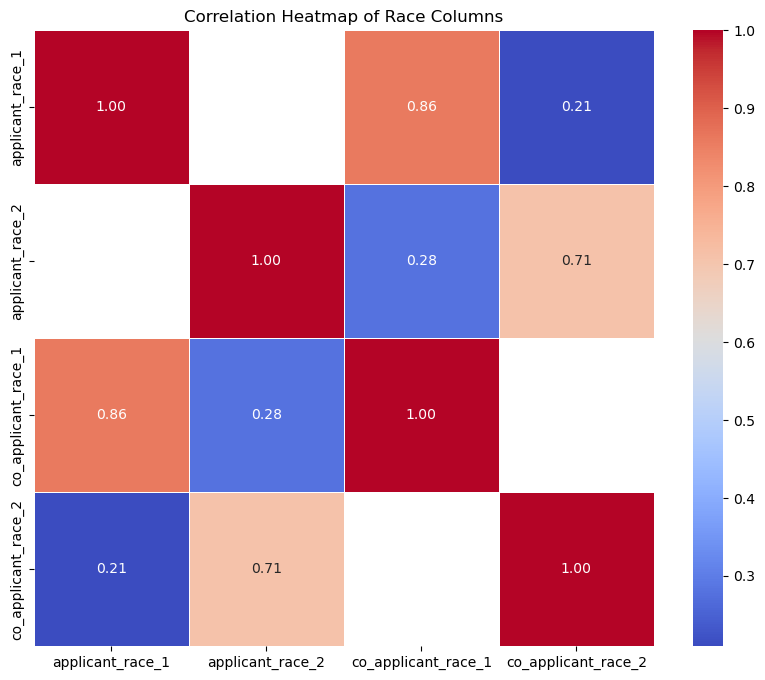

In [13]:
# Select the specified race columns
selected_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
selected_df = filtered_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Race Columns')
plt.show()

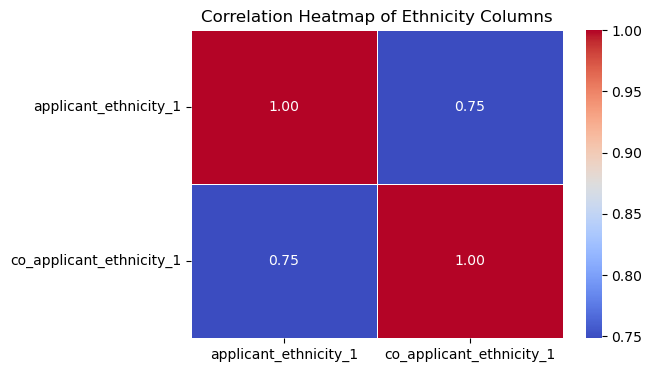

In [14]:
# Select the specified ethnicity columns
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_df =  filtered_df[columns_of_ethnicity]

# Calculate the correlation matrix
correlation_matrix_ethnicity = ethnicity_df.corr()

# Plot the heatmap for ethnicity columns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Ethnicity Columns')
plt.show()

In [15]:
# Define the race and ethnicity categories
race_categories = ['5.0', '3.0']
ethnicity_categories = ['2.0', '1.0']

# Define the columns for race and ethnicity
race_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Initialize counts for each combination
race_counts = [[0] * len(race_categories) for _ in range(len(race_columns))]
ethnicity_counts = [[0] * len(ethnicity_categories) for _ in range(len(ethnicity_columns))]

# Iterate through the DataFrame and count combinations
for idx, row in filtered_df.iterrows():
    for i, col in enumerate(race_columns):
        race_val = str(row[col])
        if race_val in race_categories:
            race_counts[i][race_categories.index(race_val)] += 1

    for i, col in enumerate(ethnicity_columns):
        ethnicity_val = str(row[col])
        if ethnicity_val in ethnicity_categories:
            ethnicity_counts[i][ethnicity_categories.index(ethnicity_val)] += 1

# Now, race_counts and ethnicity_counts have the counts for each combination
print('Race Counts:', race_counts)
print('Ethnicity Counts:', ethnicity_counts)


Race Counts: [[135470, 12658], [1417, 166], [66252, 3551], [557, 34]]
Ethnicity Counts: [[149265, 19538], [72189, 8501]]


In [16]:
def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['1.0', '2.0'], index=categories)
    df.index.name = 'ethnicity_categories'
    return df

ethnicity_categories = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Generate and display the Ethnicity Counts table
print('Ethnicity Counts:')
ethnicity_table = generate_counts_table(ethnicity_counts, ethnicity_categories)
print(ethnicity_table)

Ethnicity Counts:
                             1.0    2.0
ethnicity_categories                   
applicant_ethnicity_1     149265  19538
co_applicant_ethnicity_1   72189   8501


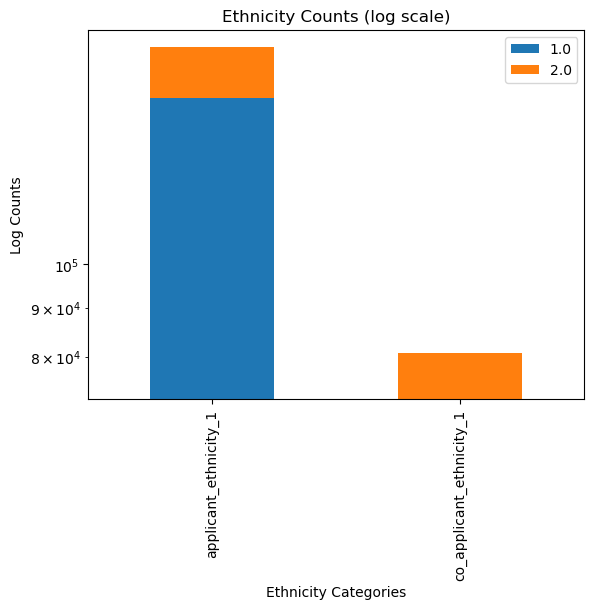

In [17]:
# Plot the Ethnicity Counts on a logarithmic scale
ethnicity_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Ethnicity Categories')
plt.ylabel('Log Counts')
plt.title('Ethnicity Counts (log scale)')
plt.show()

In [18]:
import pandas as pd

def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['5.0', '3.0'], index=categories)
    df.index.name = 'race_categories'
    return df

race_categories = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

# Generate and display the Race Counts table
print('Race Counts:')
race_table = generate_counts_table(race_counts, race_categories)
print(race_table)


Race Counts:
                        5.0    3.0
race_categories                   
applicant_race_1     135470  12658
applicant_race_2       1417    166
co_applicant_race_1   66252   3551
co_applicant_race_2     557     34


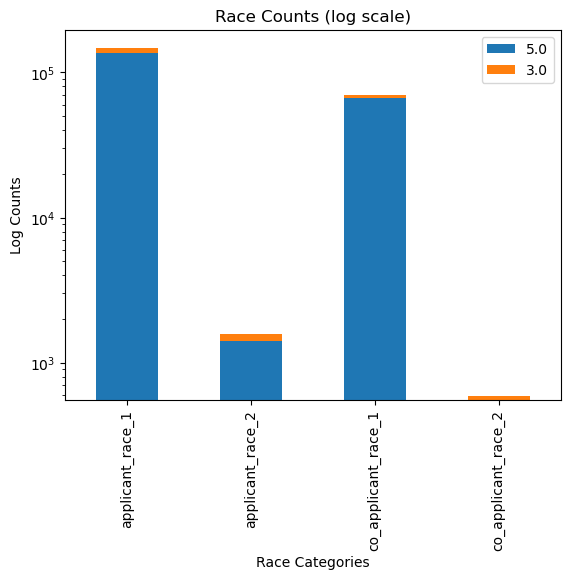

In [19]:
# Plot the Race Counts on a logarithmic scale
race_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Race Categories')
plt.ylabel('Log Counts')
plt.title('Race Counts (log scale)')
plt.show()

## See all the WHITE applicants.

In [20]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_5 = filtered_df[(filtered_df['applicant_race_1'] == 5.0)]

race_columns1 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns1 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns = race_columns1 + ethnicity_columns1
filtered_df_selected_columns = filtered_df_applicant_race_1_5[selected_columns]

In [21]:
filtered_df_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135470 entries, 2 to 190080
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_race_2          0 non-null       float64
 1   co_applicant_race_1       64092 non-null   float64
 2   co_applicant_race_2       301 non-null     float64
 3   applicant_ethnicity_1     131101 non-null  float64
 4   co_applicant_ethnicity_1  64695 non-null   float64
dtypes: float64(5)
memory usage: 6.2 MB


In [22]:
# Sort with NaN values at the bottom
df_sorted = pd.concat([filtered_df_selected_columns.dropna(), 
                       filtered_df_selected_columns[filtered_df_selected_columns.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics = df_sorted.describe()

In [23]:
print(statistics)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count               0.0         64092.000000           301.000000   
mean                NaN             4.986675             4.933555   
std                 NaN             0.162702             0.359032   
min                 NaN             3.000000             3.000000   
25%                 NaN             5.000000             5.000000   
50%                 NaN             5.000000             5.000000   
75%                 NaN             5.000000             5.000000   
max                 NaN             5.000000             5.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count          131101.000000              64695.000000  
mean                1.880924                  1.891012  
std                 0.323879                  0.311627  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- White applicants generally have only one race.
- Most co applicants for white people are black.
- Some co applicants have a 2nd race.

- White applicants do NOT have Hispanic or Latino ethnicity
- Same for the co applicant.

## See all the BLACK applicants.

In [24]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_3 = filtered_df[(filtered_df['applicant_race_1'] == 3.0)]

race_columns2 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns2 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns2 = race_columns2 + ethnicity_columns2
filtered_df_selected_columns2 = filtered_df_applicant_race_1_3[selected_columns2]

In [25]:
filtered_df_selected_columns2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12658 entries, 0 to 190081
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   applicant_race_2          303 non-null    float64
 1   co_applicant_race_1       3483 non-null   float64
 2   co_applicant_race_2       55 non-null     float64
 3   applicant_ethnicity_1     11938 non-null  float64
 4   co_applicant_ethnicity_1  3433 non-null   float64
dtypes: float64(5)
memory usage: 593.3 KB


In [26]:
# Sort with NaN values at the bottom
df_sorted2 = pd.concat([filtered_df_selected_columns2.dropna(), 
                       filtered_df_selected_columns2[filtered_df_selected_columns2.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics2 = df_sorted2.describe()

In [27]:
print(statistics2)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count             303.0          3483.000000            55.000000   
mean                5.0             3.279070             4.672727   
std                 0.0             0.693107             0.746710   
min                 5.0             3.000000             3.000000   
25%                 5.0             3.000000             5.000000   
50%                 5.0             3.000000             5.000000   
75%                 5.0             3.000000             5.000000   
max                 5.0             5.000000             5.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count           11938.000000               3433.000000  
mean                1.972357                  1.946694  
std                 0.163954                  0.224676  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- Black applicants mostly are one race, but some are mixed.
- co applicants for black people are fairly evenly spread black and white.
- Some co applicants have a 2nd race.

- Black applicants do NOT have Hispanic or Latino ethnicity
- Same for the co applicant.

In [28]:
filtered_df.to_csv('3_distribution_race_ethnicity.csv', index=False)